# Repeated Two-factor Analysis of Variance

# 1. Data import

In [33]:
import pandas as pd

df = pd.read_excel('Intensity (repeated two factors).xlsx')
df.head()

,A,B,Intensity
0,1,1,305
1,1,1,302
2,1,2,335
3,1,2,337
4,1,3,366


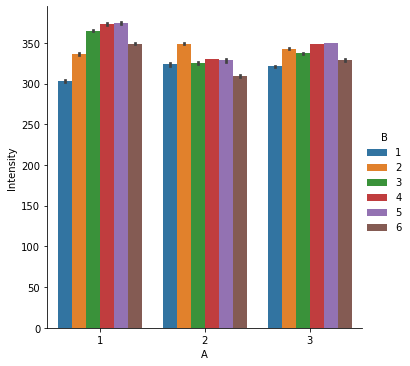

In [36]:
import seaborn as sns
g = sns.catplot(x="A", y="Intensity", hue="B", data=df, kind="bar");

# 2. Analysis

## 2.1 Analysis of variance

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols('Intensity ~ C(A)+C(B)+C(A):C(B)', df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df       sum_sq      mean_sq       F        PR(>F)
C(A)        2.0  3088.222222  1544.111111  694.85  9.138219e-18
C(B)        5.0  5548.888889  1109.777778  499.40  1.203726e-18
C(A):C(B)  10.0  4825.777778   482.577778  217.16  1.190081e-16
Residual   18.0    40.000000     2.222222     NaN           NaN


## 2.2. Post-hoc test

### 2.2.1. Simple effect test

In [37]:
df_A1=df.loc[df['A'] == 1]
m_comp = pairwise_tukeyhsd(endog=df_A1['Intensity'], groups=df_A1['B'], alpha=0.05)
print('B@A1')
print(m_comp)

df_A2=df.loc[df['A'] == 2]
m_comp = pairwise_tukeyhsd(endog=df_A2['Intensity'], groups=df_A2['B'], alpha=0.05)
print('B@A2')
print(m_comp)

df_A3=df.loc[df['A'] == 3]
m_comp = pairwise_tukeyhsd(endog=df_A3['Intensity'], groups=df_A3['B'], alpha=0.05)
print('B@A3')
print(m_comp)

B@A1
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2     32.5  0.001  25.7988  39.2012   True
     1      3     61.5  0.001  54.7988  68.2012   True
     1      4     69.5  0.001  62.7988  76.2012   True
     1      5     71.0  0.001  64.2988  77.7012   True
     1      6     45.5  0.001  38.7988  52.2012   True
     2      3     29.0  0.001  22.2988  35.7012   True
     2      4     37.0  0.001  30.2988  43.7012   True
     2      5     38.5  0.001  31.7988  45.2012   True
     2      6     13.0 0.0019   6.2988  19.7012   True
     3      4      8.0 0.0228   1.2988  14.7012   True
     3      5      9.5   0.01   2.7988  16.2012   True
     3      6    -16.0  0.001 -22.7012  -9.2988   True
     4      5      1.5    0.9  -5.2012   8.2012  False
     4      6    -24.0  0.001 -30.7012 -17.2988   True
     5      6    -25.5  0.001 -32.2012 -18.7988   True
-----

### 2.2.2. Tukey test

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df['Intensity'], groups=df['A'], alpha=0.05)
print(m_comp)

m_comp = pairwise_tukeyhsd(endog=df['Intensity'], groups=df['B'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -22.6667   0.01 -40.4597 -4.8736   True
     1      3 -12.1667  0.229 -29.9597  5.6264  False
     2      3     10.5 0.3292  -7.2931 28.2931  False
-----------------------------------------------------
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  26.6667 0.0788  -1.9263 55.2596  False
     1      3  26.3333  0.085  -2.2596 54.9263  False
     1      4  34.3333 0.0115   5.7404 62.9263   True
     1      5     35.0 0.0096    6.407  63.593   True
     1      6     13.0 0.7118  -15.593  41.593  False
     2      3  -0.3333    0.9 -28.9263 28.2596  False
     2      4   7.6667    0.9 -20.9263 36.2596  False
     2      5   8.3333    0.9 -20.2596 36.9263  False
     2      6 -13.6667 0.672

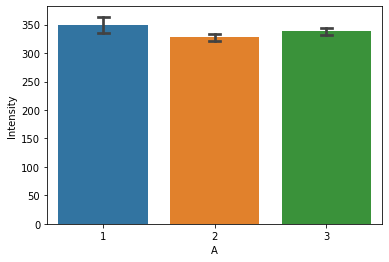

In [42]:
ax=sns.barplot(x=df['A'],y=df['Intensity'],capsize=.1) # the cap is SE

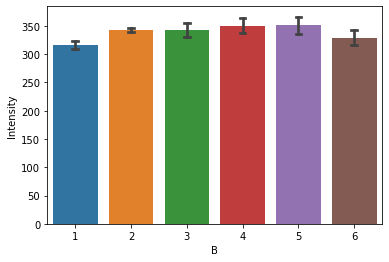

In [41]:
ax=sns.barplot(x=df['B'],y=df['Intensity'],capsize=.1) # the cap is SE